### Description
t includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

    Id
    SepalLengthCm
    SepalWidthCm
    PetalLengthCm
    PetalWidthCm
    Species


In [2]:
#Importing Libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Loading the dataset
df = pd.read_csv("E:\ML\Datasets\IRIS.csv")
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa


In [5]:
#Getting data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#Checking null vallues
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

No null values

In [12]:
#Checking duplicate values
df.duplicated().sum()

np.int64(3)

3 duplicate values

In [13]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [24]:
print("rows are: {0} and columns are: {1}".format(df.shape[0],df.shape[1]))

rows are: 147 and columns are: 5


In [14]:
#Dropping duplicate values
df.drop_duplicates(inplace=True)

In [16]:
#Again check duplicate values
df.duplicated().sum()

np.int64(0)

In [18]:
#Getting the statical information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,147.0,5.856463,0.829100,4.3,5.1,5.8,6.4,7.9
sepal_width,147.0,3.055782,0.437009,2.0,2.8,3.0,3.3,4.4
petal_length,147.0,3.780272,1.759111,1.0,1.6,4.4,5.1,6.9
petal_width,147.0,1.208844,0.757874,0.1,0.3,1.3,1.8,2.5


- sepal min length is 4.3, max is 7.9 and avg is 5.8
- sepal min width is 2.0, max is 4.4 and avg is 3.0
- petal min length is 1.0, max is 6.9 and avg is 3.7
- petal min width is 0.1, max is 2.5 and avg is 1.2

### Data Visulization

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64


<Axes: xlabel='species', ylabel='count'>

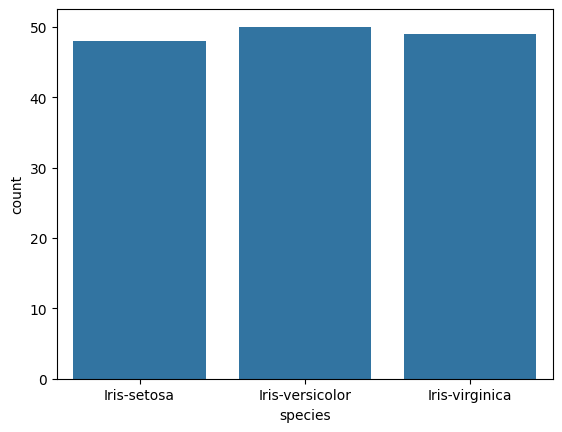

In [28]:
print(df['species'].value_counts())
sns.countplot(data=df,x='species')

<Axes: >

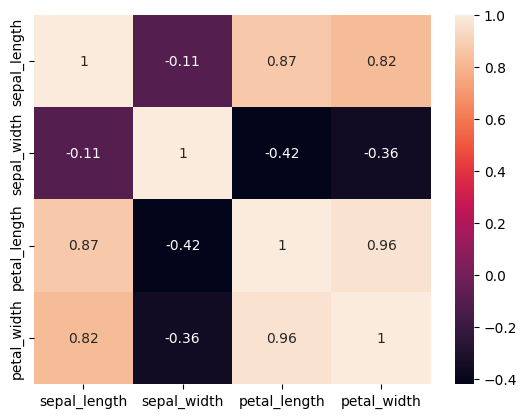

In [41]:
#Heatmap for the correlation check
sns.heatmap(data=df.drop(['species'],axis=1).corr(),annot=True)

### Correlation Analysis of Iris Dataset Features  

The correlation matrix shows the relationship between different flower measurements:

| Feature 1      | Feature 2      | Correlation | Interpretation |
|----------------|----------------|-------------|----------------|
| Sepal Length   | Sepal Width    | **-0.11**   | Weak negative correlation (almost no relationship). |
| Sepal Length   | Petal Length   | **0.87**    | Strong positive correlation – as sepal length increases, petal length also tends to increase. |
| Sepal Length   | Petal Width    | **0.82**    | Strong positive correlation – larger sepal length is associated with larger petal width. |
| Sepal Width    | Petal Length   | **-0.42**   | Moderate negative correlation – wider sepals are somewhat linked to shorter petals. |
| Sepal Width    | Petal Width    | **-0.36**   | Moderate negative correlation – wider sepals are linked to narrower petals. |
| Petal Length   | Petal Width    | **0.96**    | Very strong positive correlation – longer petals almost always have wider petals. |

### Key Insights:
- **Petal Length and Petal Width (0.96)** have the strongest positive correlation, indicating they are highly dependent on each other.  
- **Sepal Length** is positively correlated with both **petal length (0.87)** and **petal width (0.82)**.  
- **Sepal Width** shows negative correlations with other features, especially petal dimensions.  
- This suggests **petal measurements are better predictors for classification** of Iris species than sepal measurements.  


In [45]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


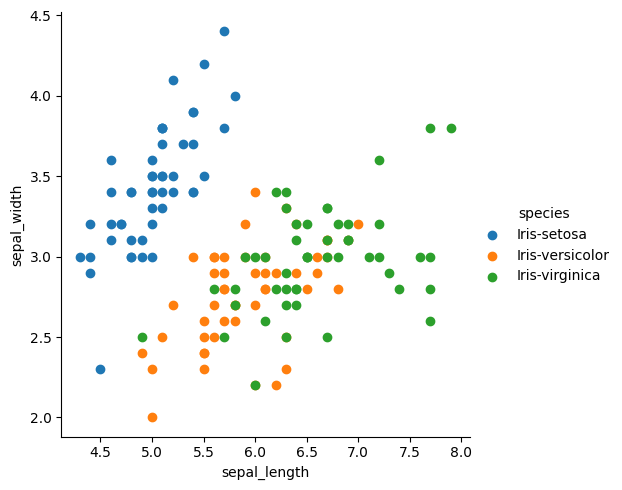

In [52]:
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(data=df , hue='species',height=5).map(plt.scatter,"sepal_length", "sepal_width").add_legend()

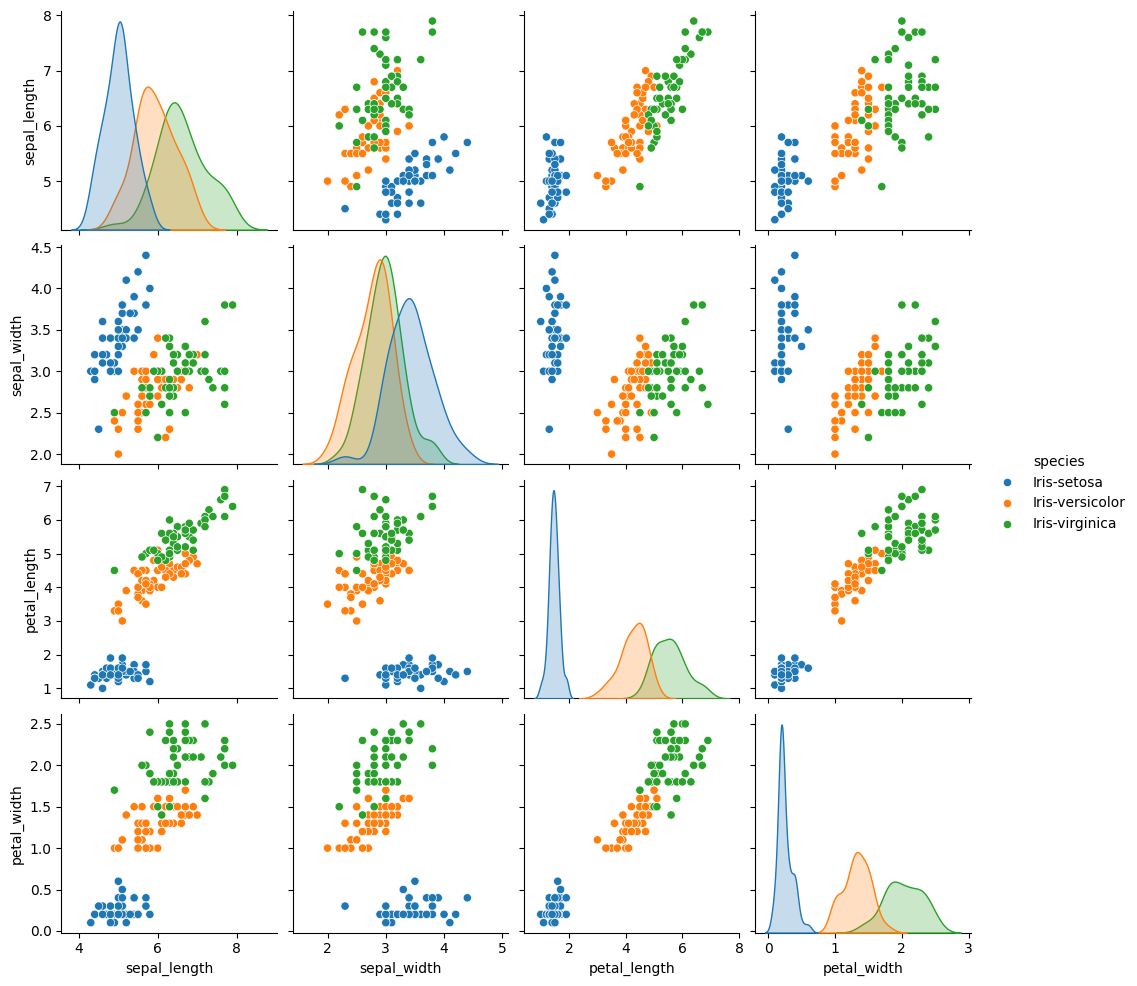

In [48]:
#let Create a pair plot of some columns 
sns.pairplot(df.iloc[:,:],hue='species')  # graph also  tell us about the the realationship between the two columns 

- In this we can see the data is increasing linearly so we can go for that

array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

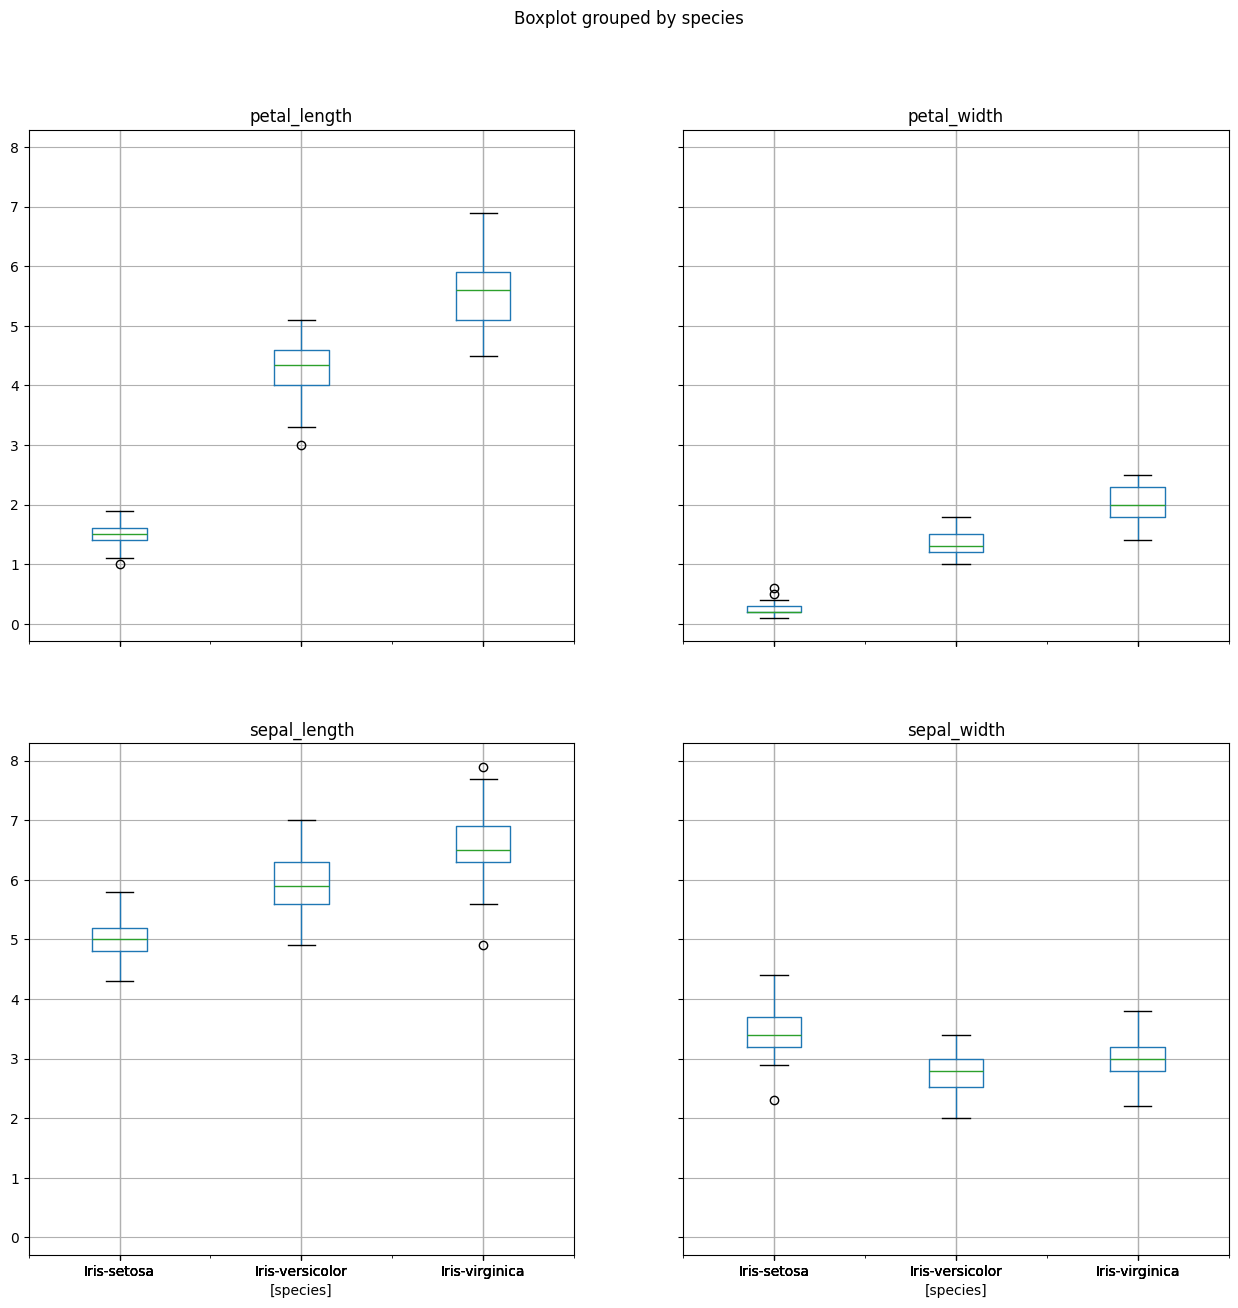

In [54]:
# We can quickly make a boxplot with Pandas on each feature split out by species
df.boxplot(by="species", figsize=(15,15))

- Steps to followed when applying an algorithm.
- Split the data into trainning and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.
- Select the algorithms based on the problem classification or regression.
- Then pass the training dataset to the algorithm to train it. We use the .fit() method
- Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.
- We then check the accuracy by passing the predicted outcome and the actual output to the model.

In [56]:
#importing all the necesary pakages to Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


Feature Selection

In [57]:
X = df.drop(['species'],axis=1)
y = df['species']

In [61]:
X,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [147 rows x 4 columns],
 0         Iris-setosa
 1         Iris-setosa
 2         Iris-setosa
 3         Iris-setosa
 4         Iris-setosa
             ...      
 145    Iris-virginica
 146    Iris-virginica
 147    Iris-virginica
 148    Iris-virginica
 149    Iris-virginica
 Name: speci

In [62]:
#turning data into train test split
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [64]:
print("Train shape",X_train.shape)
print("Test shape",X_test.shape)

Train shape (110, 4)
Test shape (37, 4)


Logistic Regression

In [65]:
log = LogisticRegression()
log.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [66]:
prediction=log.predict(X_test)

In [68]:
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 1.0


Accuracy is 1 so over model is overfitting with data

In [70]:
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn.svm import SVC   #for Support Vector Machine (SVM) Algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

In [72]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
prediction=tree.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Decision Tree is 0.972972972972973
